In [25]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.base import clone
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
#from sklearn.svm import SVC

In [26]:
data = pd.read_csv('/content/heart_2020_cleaned.csv')
read = pd.DataFrame(data)
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [28]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [29]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
319790    False
319791    False
319792    False
319793    False
319794    False
Length: 319795, dtype: bool

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = data.drop('HeartDisease', axis=1)  # Features
y = data['HeartDisease']  # Target variable

In [32]:
encoder=LabelEncoder()
for col in X.columns:
    X[col]=encoder.fit_transform(X[col])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [34]:
print(data.columns)

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [35]:
print(X_train.shape, X_test.shape)

(223856, 17) (95939, 17)


In [36]:
print(y_train.shape, y_test.shape)

(223856,) (95939,)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [41]:
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix= confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [43]:
print('accuracy')
print(accuracy)

print('conf matrix')
print(conf_matrix)

print('class report')
print(class_report)

accuracy
0.9123192862131145
conf matrix
[[87104   669]
 [ 7743   423]]
class report
              precision    recall  f1-score   support

          No       0.92      0.99      0.95     87773
         Yes       0.39      0.05      0.09      8166

    accuracy                           0.91     95939
   macro avg       0.65      0.52      0.52     95939
weighted avg       0.87      0.91      0.88     95939



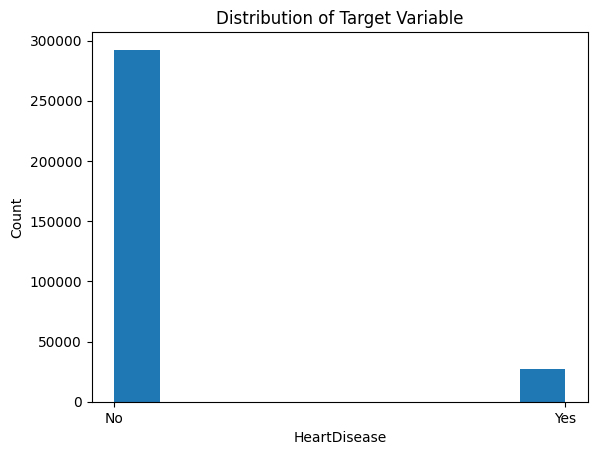

<ipython-input-52-861b529d10dd>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


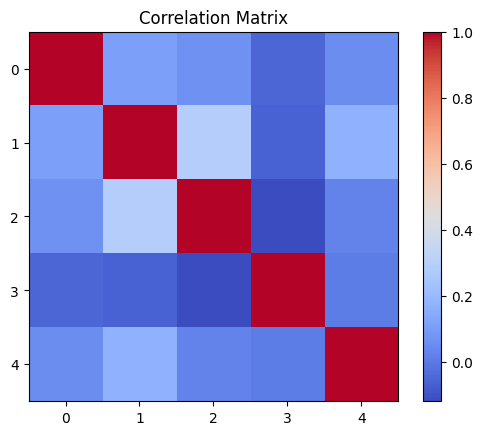

In [52]:
# prompt: plots

import numpy as np
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
plt.hist(y)
plt.xlabel('HeartDisease')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

# Plot the correlation matrix
corr_matrix = data.corr()
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()


In [49]:
# prompt:

# Create a new column called 'HeartDisease_encoded' in the data DataFrame
data['HeartDisease_encoded'] = encoder.fit_transform(data['HeartDisease'])

# Create a new DataFrame called 'encoded_data' that contains only the encoded columns
encoded_data = data[['HeartDisease_encoded']]

# Print the encoded data
print(encoded_data.head())


   HeartDisease_encoded
0                     0
1                     0
2                     0
3                     0
4                     0
